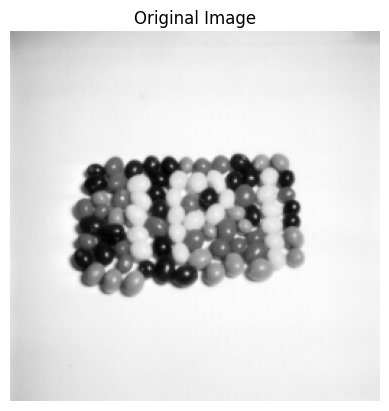

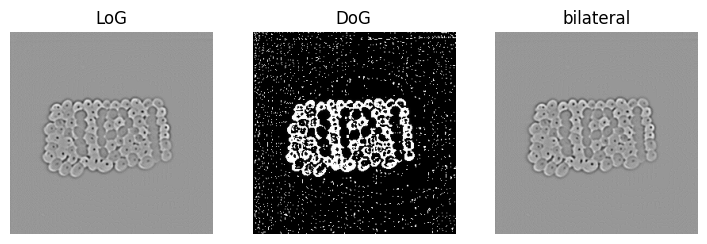

In [156]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = 'image/4.1.07.tiff'
# Load image
img = cv2.imread("image/4.1.07.tiff",0) 
 # Use grayscale for filtering
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

# TODO: Apply DoG
blur = cv2.GaussianBlur(img, (5,5), 1)
blur1 = cv2.GaussianBlur(img, (5,5), 1)
blur2 = cv2.GaussianBlur(img, (5,5), 2)
dog = blur1 - blur2

plt.figure(figsize=(12,4))
plt.subplot(1,4,3); plt.imshow(dog, cmap="gray"); plt.axis('off'); plt.title("DoG")
# TODO: Apply LoG
log = cv2.Laplacian(blur, cv2.CV_64F)
plt.subplot(1,4,2); plt.imshow(log, cmap="gray"); plt.axis('off'); plt.title("LoG")
# TODO: Apply bilateral (edge-preserving) filter
filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
plt.subplot(1,4,4); plt.imshow(log, cmap="gray"); plt.axis('off'); plt.title("bilateral")
plt.show()
# Show all results for comparison

In [157]:
# Summary
#LoG: Finds edges by first blurring the image and then applying Laplacian.
#DoG: Finds edges too, but faster by subtracting two blurred images.
#Bilateral: Smooths the image but keeps edges sharp.

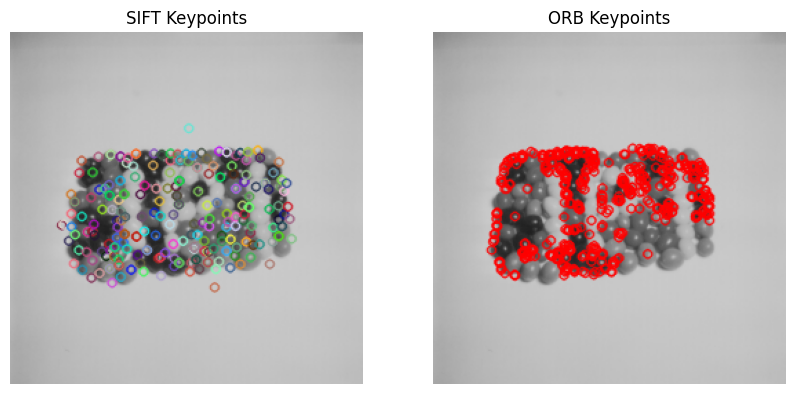

Number of SIFT keypoints: 241
Number of ORB keypoints: 460


In [158]:
# Display SIFT keypoints using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_sift)
plt.title("SIFT Keypoints")
plt.axis('off')

# Display ORB keypoints using matplotlib
plt.subplot(1, 2, 2)
plt.imshow(imageresult)
plt.title("ORB Keypoints")
plt.axis('off')
plt.show()

# Count and compare number of keypoints for SIFT and ORB
print("Number of SIFT keypoints:", len(sift_keypoints))
print("Number of ORB keypoints:", len(img_keypoints))
# SIFT generally detects more keypoints than ORB, especially in complex images.
 
 

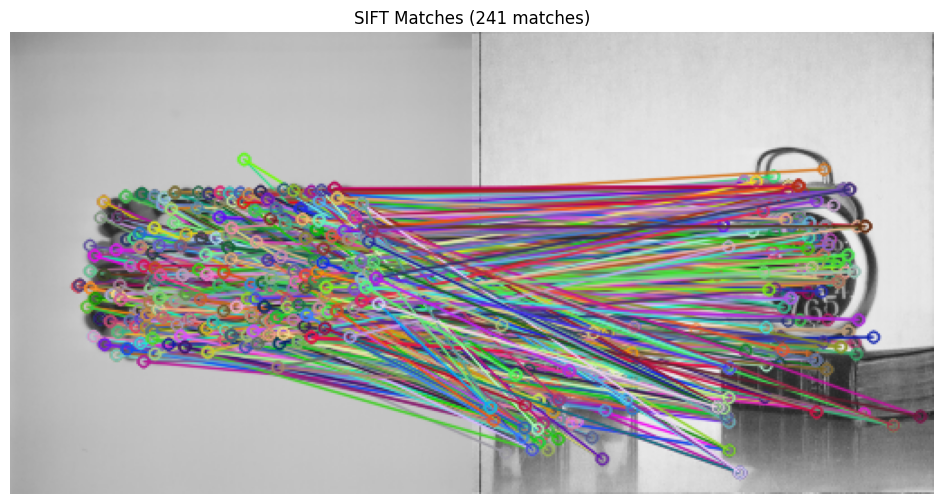

In [159]:
# Use already imported modules and variables Use already imported modules and variables

# Load the second image (already loaded as img in grayscale, so we only need img2)
img2 = cv2.imread('image/5.1.12.tiff', 0)

# Use the already created SIFT detector
# Find the keypoints and descriptors with SIFT for both images
jellybean_keypoints, jellybean_descriptors = sift_Detector.detectAndCompute(img, None)
clock_keypoints, clock_descriptors = sift_Detector.detectAndCompute(img2, None)

# Match descriptors using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(jellybean_descriptors, clock_descriptors, k=2)
number_of_matches = len(matches)

# Draw matches using matplotlib for display in Jupyter
img_matches = cv2.drawMatchesKnn(img, jellybean_keypoints, img2, clock_keypoints, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.axis('off')
plt.title(f'SIFT Matches ({number_of_matches} matches)')
plt.show()




In [160]:
#The matches show some correct points but also several mismatches
# This happens with brute-force matching using default settings. 
# To improve, I could use Lowe’s ratio test, cross-checking, or FLANN for more accurate results

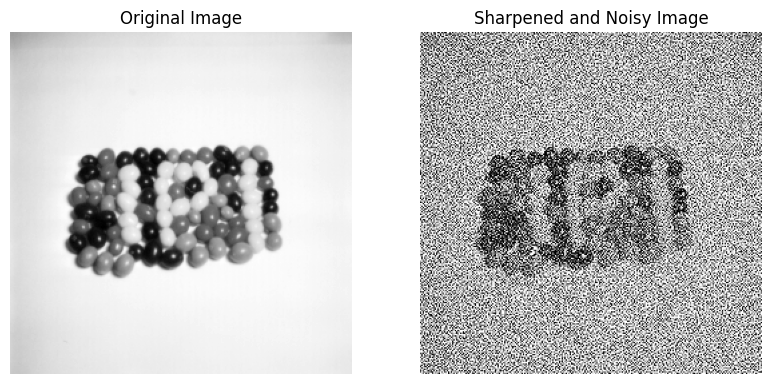

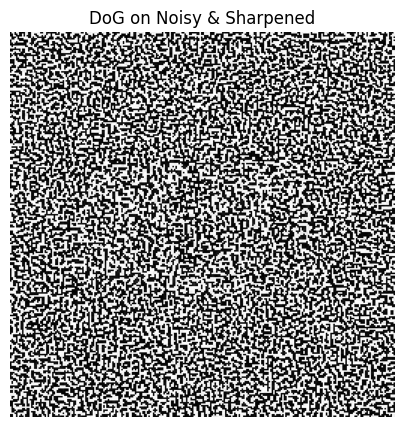

In [ ]:
# Use already imported modules and the already loaded grayscale image 'img'

# --- Add Gaussian Noise ---
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

plt.figure(figsize=(15,5))
# Show original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply both noise and sharpening to the image
noisy_img = add_gaussian_noise(img)
sharpened_noisy_img = sharpen_image(noisy_img)
plt.subplot(1, 3, 2)
plt.imshow(sharpened_noisy_img, cmap='gray')
plt.title('Sharpened and Noisy Image')
plt.axis('off')
plt.show()
# Apply DoG filter to the noisy and sharpened image
blur1_noisy = cv2.GaussianBlur(sharpened_noisy_img, (5,5), 1)
blur2_noisy = cv2.GaussianBlur(sharpened_noisy_img, (5,5), 2)
dog_noisy = blur1_noisy - blur2_noisy
plt.figure(figsize=(5,5))
plt.imshow(dog_noisy, cmap="gray")
plt.axis('off')
plt.title("DoG on Noisy & Sharpened")
plt.show()


In [162]:
#Adding noise made edge detection less accurate and created false edges. 
# Sharpening made edges clearer and helped detect features more easily.
# Overall, noise reduces match quality, while sharpening improves it.